In [32]:
from ign_layers import layer_2_to_2_anydim, layer_2_to_1_anydim
import torch
gnn = layer_2_to_2_anydim(input_depth=1, output_depth=3)
gnn.all_bias = torch.nn.Parameter(torch.ones(1,3,1,1))
A = torch.randn(5, 3, 30, 30) * 50
A2 = torch.kron(A, torch.ones(1,1,5,5))
A = gnn(gnn(A))
A2 = gnn(gnn(A2))
print(
    torch.max(
        torch.abs(
            torch.kron(A, torch.ones(1, 1, 5, 5)) - A2,
        )
    )
)

tensor(1.1444e-05, grad_fn=<MaxBackward1>)


In [31]:
A = torch.randn(5, 3, 30, 30) * 50
A2 = torch.kron(A, torch.ones(1,1,5,5))
gnn = layer_2_to_1_anydim(input_depth=3, output_depth=3)
X = gnn(A)
X2 = gnn(A2)
print(
    torch.max(
        torch.abs(
            torch.kron(X, torch.ones(1, 1, 5)) - X2,
        )
    )
)   

tensor(7.6294e-06, grad_fn=<MaxBackward1>)


In [59]:
# check whether model is compatible
from model import GNN_layer
import torch

reduced = True
gnn1 = GNN_layer(A_in_channels=1, A_out_channels=3, x_in_channels=3, x_out_channels=3, reduced=reduced)
# gnn1.A_bias = torch.nn.Parameter(torch.ones(1,1,1,3))
# gnn1.X1_bias = torch.nn.Parameter(torch.ones(1, 1, 3))
# gnn1.X1_bias = torch.nn.Parameter(torch.ones(1, 1, 3))
gnn2 = GNN_layer(A_in_channels=3, A_out_channels=3, x_in_channels=3, x_out_channels=3, reduced=reduced)
# gnn2.A_bias = torch.nn.Parameter(torch.ones(1, 1, 1, 3))
# gnn2.X1_bias = torch.nn.Parameter(torch.ones(1, 1, 3))
# gnn2.X1_bias = torch.nn.Parameter(torch.ones(1, 1, 3))

A = torch.randn(5, 1, 30, 30) * 5
X = torch.randn(5, 30, 3) * 50
A2 = torch.kron(A, torch.ones(1, 1, 10, 10))
X2 = torch.kron(X, torch.ones(1, 10, 1))

A, X = gnn1(A, X)
A, X = gnn2(A, X)
A = A.contiguous()
X = X.contiguous()

A2, X2 = gnn1(A2, X2)
A2, X2 = gnn2(A2, X2)
A2 = A2.contiguous()
X2 = X2.contiguous()

In [60]:
print(torch.max(torch.abs(torch.kron(A, torch.ones(1, 1, 10, 10))- A2,)))

tensor(0.0022, grad_fn=<MaxBackward1>)


In [61]:
print(torch.max(torch.abs((torch.kron(X, torch.ones(1, 10, 1)) - X2)/X2)))

tensor(0.0088, grad_fn=<MaxBackward1>)


In [3]:
torch.allclose(torch.kron(A, torch.ones(1, 1, 10, 10)), A2, atol=1e-2)

True

In [31]:
torch.allclose(torch.kron(X, torch.ones(1, 10, 1)), X2, rtol=1e-2)

True

In [7]:
X[0, :, 0]

tensor([ -138.0289,  2374.2568,  1885.9329,  5880.6777,  2585.2817, -4164.3267,
         1503.0387, -1917.3857,   202.5159, -4823.2051,  2099.5747, -1644.4325,
        -6831.9419, -3192.9985,  -529.5280, -1379.6025, -5791.6953, -5297.5801,
         -305.5816, -8731.4033,   370.5906,  -979.9750,   900.9713, -3107.4626,
         3191.2153, -5164.0146,  -370.4365, -4045.1904,  2239.4126,  2477.7068],
       grad_fn=<SelectBackward0>)

In [8]:
X2[0,:,0]

tensor([ -138.0194,  -138.0194,  -138.0194,  -138.0197,  -138.0194,  -138.0194,
         -138.0194,  -138.0197,  -138.0194,  -138.0194,  2374.2825,  2374.2810,
         2374.2815,  2374.2825,  2374.2825,  2374.2810,  2374.2815,  2374.2825,
         2374.2825,  2374.2810,  1885.8997,  1885.8994,  1885.8994,  1885.8987,
         1885.8997,  1885.8994,  1885.8994,  1885.8987,  1885.8997,  1885.8994,
         5880.6709,  5880.6709,  5880.6709,  5880.6709,  5880.6709,  5880.6709,
         5880.6709,  5880.6709,  5880.6709,  5880.6709,  2585.2883,  2585.2874,
         2585.2874,  2585.2881,  2585.2883,  2585.2874,  2585.2874,  2585.2881,
         2585.2883,  2585.2874, -4164.3237, -4164.3257, -4164.3232, -4164.3237,
        -4164.3237, -4164.3257, -4164.3232, -4164.3237, -4164.3237, -4164.3257,
         1503.0149,  1503.0129,  1503.0129,  1503.0134,  1503.0149,  1503.0129,
         1503.0129,  1503.0134,  1503.0149,  1503.0129, -1917.3818, -1917.3818,
        -1917.3809, -1917.3818, -1917.38

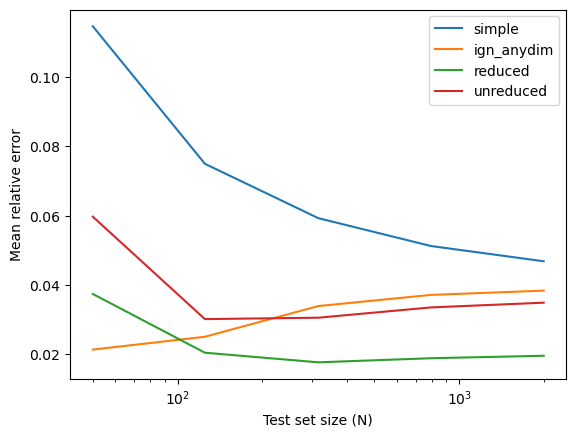

In [34]:
import os,json
import numpy as np
import matplotlib.pyplot as plt
num_trials = 10
log_test_n_range = np.arange(1.7, 3.4, 0.4)
test_n_range = np.array([int(10**i) for i in log_test_n_range])
for model in ["simple","ign_anydim", "reduced", "unreduced"]:
    fname = f"results_Sociality_conditional_triangle_{model}.json"
    current_directory = os.getcwd()
    with open(os.path.join("log/size_generalizability", fname), "r") as f:
        results = json.load(f)
    mse_list = [results[model][str(seed)] for seed in range(num_trials)]
    mean_mse = np.median(mse_list, axis=0)
    std_mse = np.std(mse_list, axis=0)

    x = np.array(test_n_range)
    plt.plot(x, mean_mse, label = model)
    # plt.fill_between(
    #     x,
    #     mean_mse - std_mse,
    #     mean_mse + std_mse,
    #     alpha=0.3,
    # )
plt.xscale("log")
plt.xlabel("Test set size (N)")
plt.ylabel("Mean relative error")
plt.legend()

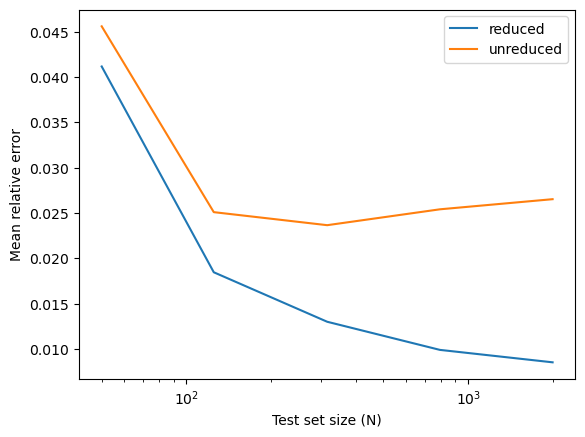

In [1]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

num_trials = 5
log_test_n_range = np.arange(1.7, 3.4, 0.4)
test_n_range = np.array([int(10**i) for i in log_test_n_range])
for model in ["reduced", "unreduced"]:
    fname = f"results_Sociality_conditional_triangle_{model}.json"
    current_directory = os.getcwd()
    with open(os.path.join("log/size_generalizability", fname), "r") as f:
        results = json.load(f)
    mse_list = [results[model][str(seed)] for seed in range(num_trials)]
    mean_mse = np.median(mse_list, axis=0)
    std_mse = np.std(mse_list, axis=0)

    x = np.array(test_n_range)
    plt.plot(x, mean_mse, label=model)
    # plt.fill_between(
    #     x,
    #     mean_mse - std_mse,
    #     mean_mse + std_mse,
    #     alpha=0.3,
    # )
plt.xscale("log")
plt.xlabel("Test set size (N)")
plt.ylabel("Mean relative error")
plt.legend()

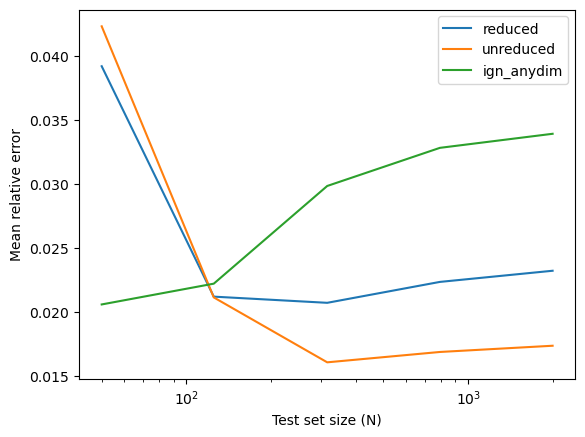

In [3]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

num_trials = 10
log_test_n_range = np.arange(1.7, 3.4, 0.4)
test_n_range = np.array([int(10**i) for i in log_test_n_range])
for model in ["reduced", "unreduced", "ign_anydim"]:
    fname = f"results_Sociality_conditional_triangle_{model}.json"
    current_directory = os.getcwd()
    with open(os.path.join("log/size_generalizability", fname), "r") as f:
        results = json.load(f)
    mse_list = [results[model][str(seed)] for seed in range(num_trials)]
    mean_mse = np.median(mse_list, axis=0)
    std_mse = np.std(mse_list, axis=0)

    x = np.array(test_n_range)
    plt.plot(x, mean_mse, label=model)
    # plt.fill_between(
    #     x,
    #     mean_mse - std_mse,
    #     mean_mse + std_mse,
    #     alpha=0.3,
    # )
plt.xscale("log")
plt.xlabel("Test set size (N)")
plt.ylabel("Mean relative error")
plt.legend()

In [1]:
import wandb
import shutil, os
import pytorch_lightning as pl
from train import GNNSizeGeneralizabilityModule

CURRENT_DIR = os.getcwd()
ENTITY_NAME = "yuxinma"
PROJECT_NAME = "anydim_transferability"


def download_best_model(run_id: str) -> pl.LightningModule:
    """Download from wandb logs the model checkpoint and its config"""
    # download the best model checkpoint
    api = wandb.Api()
    artifact = api.artifact(
        f"{ENTITY_NAME}/{PROJECT_NAME}/model-{run_id}:best"
    )  # download the best_model
    best_ckpt = artifact.download(root=os.path.join(CURRENT_DIR, "downloaded_artifact"))
    best_ckpt = os.path.join(best_ckpt, "model.ckpt")
    best_model = GNNSizeGeneralizabilityModule.load_from_checkpoint(best_ckpt, map_location=None)

    # get the run config
    run = api.run(f"{ENTITY_NAME}/{PROJECT_NAME}/{run_id}")
    config = run.config

    # clean up
    shutil.rmtree(os.path.dirname(best_ckpt))
    return best_model, config

In [3]:
model, config = download_best_model("p9blizre")

CommError: artifact 'model-p9blizre:best' not found in 'yuxinma/anydim_transferability'

0.999999999986112 1.3887943864771144e-11


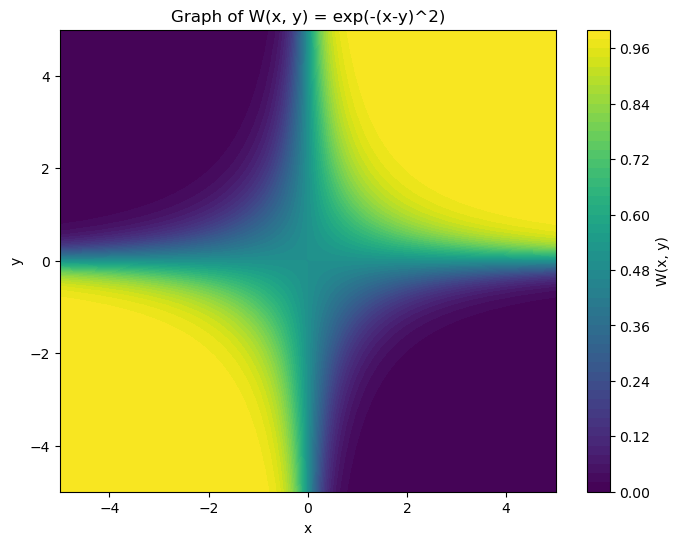

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def W(x, y):
    return 1 / (1 + np.exp(-x * y))# np.exp(-(0.2*(x - y) ** 2))


# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Compute W(x, y) for each pair of x and y values
Z = W(X, Y)
print(Z.max(), Z.min())
# Plot the resulting matrix
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap="viridis")
plt.colorbar(label="W(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph of W(x, y) = exp(-(x-y)^2)")
plt.show()